# Data visualization

In [4]:
import numpy as np # linear algebra
import pandas as pd # dataframes, data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plots
# Tools from Scikit Learn library:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

import itertools
#from pmdarima.arima import auto_arima
import statsmodels as stat
#!pip install -U statsmodels
sns.set()


## Importation de data

In [5]:
# Loading the training dataset as a Pandas DataFrame
df=pd.read_csv('ETG1.csv')
df

,Unnamed: 0,_id,RealP2,RealP3,RealP1,Vrms1,ETG,date,index,Vrms2,Irms2,Irms3,Irms1,PowerF2,PowerF3,Vrms3,PowerF1
0,0,61d9cefbdd4ae07ecb861f64,8.5,25.8,3.2,260.3,1,2022-01-01 00:00:02,59338,258.4,239.3,284.1,342.7,0.138,0.350,260.2,0.036
1,1,61d9cefbdd4ae07ecb861f68,12.4,23.7,7.6,260.5,1,2022-01-01 00:00:07,59339,258.3,240.5,272.0,332.6,0.200,0.334,260.1,0.087
2,2,61d9cefbdd4ae07ecb861f6c,8.9,25.3,3.0,260.4,1,2022-01-01 00:00:13,59340,258.3,231.5,279.1,335.5,0.150,0.348,260.2,0.034
3,3,61d9cefbdd4ae07ecb861f70,11.0,22.3,7.0,260.5,1,2022-01-01 00:00:18,59341,258.3,238.4,272.7,343.8,0.179,0.314,260.2,0.078
4,4,61d9cefbdd4ae07ecb861f74,11.6,27.2,4.2,260.5,1,2022-01-01 00:00:23,59342,258.3,241.3,278.7,336.0,0.186,0.375,260.3,0.048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862352,862352,62141bb4dd4ae07ecbbab1b4,12.0,28.2,6.6,259.3,1,2022-02-22 00:09:40,921931,257.2,243.0,286.0,406.4,0.193,0.380,259.0,0.063
862353,862353,62141bb9dd4ae07ecbbab1b8,9.6,22.7,7.8,259.1,1,2022-02-22 00:09:45,921932,257.1,242.0,279.6,420.0,0.154,0.313,258.8,0.072
862354,862354,62141bbedd4ae07ecbbab1bc,13.1,27.9,7.7,259.2,1,2022-02-22 00:09:50,921933,257.1,248.1,283.3,409.5,0.206,0.380,258.9,0.072
862355,862355,62141bc3dd4ae07ecbbab1c0,7.6,24.4,8.4,259.1,1,2022-02-22 00:09:55,921934,257.4,249.8,281.6,433.6,0.119,0.335,258.7,0.074


## Fixation date

In [6]:
#transformer la colonne de type objet en type  date 
timefmt = "%Y-%m-%d %H:%M:%S" 
df['date'] = pd.to_datetime(df['date'], format = timefmt, errors='coerce')
df

,Unnamed: 0,_id,RealP2,RealP3,RealP1,Vrms1,ETG,date,index,Vrms2,Irms2,Irms3,Irms1,PowerF2,PowerF3,Vrms3,PowerF1
0,0,61d9cefbdd4ae07ecb861f64,8.5,25.8,3.2,260.3,1,2022-01-01 00:00:02,59338,258.4,239.3,284.1,342.7,0.138,0.350,260.2,0.036
1,1,61d9cefbdd4ae07ecb861f68,12.4,23.7,7.6,260.5,1,2022-01-01 00:00:07,59339,258.3,240.5,272.0,332.6,0.200,0.334,260.1,0.087
2,2,61d9cefbdd4ae07ecb861f6c,8.9,25.3,3.0,260.4,1,2022-01-01 00:00:13,59340,258.3,231.5,279.1,335.5,0.150,0.348,260.2,0.034
3,3,61d9cefbdd4ae07ecb861f70,11.0,22.3,7.0,260.5,1,2022-01-01 00:00:18,59341,258.3,238.4,272.7,343.8,0.179,0.314,260.2,0.078
4,4,61d9cefbdd4ae07ecb861f74,11.6,27.2,4.2,260.5,1,2022-01-01 00:00:23,59342,258.3,241.3,278.7,336.0,0.186,0.375,260.3,0.048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862352,862352,62141bb4dd4ae07ecbbab1b4,12.0,28.2,6.6,259.3,1,2022-02-22 00:09:40,921931,257.2,243.0,286.0,406.4,0.193,0.380,259.0,0.063
862353,862353,62141bb9dd4ae07ecbbab1b8,9.6,22.7,7.8,259.1,1,2022-02-22 00:09:45,921932,257.1,242.0,279.6,420.0,0.154,0.313,258.8,0.072
862354,862354,62141bbedd4ae07ecbbab1bc,13.1,27.9,7.7,259.2,1,2022-02-22 00:09:50,921933,257.1,248.1,283.3,409.5,0.206,0.380,258.9,0.072
862355,862355,62141bc3dd4ae07ecbbab1c0,7.6,24.4,8.4,259.1,1,2022-02-22 00:09:55,921934,257.4,249.8,281.6,433.6,0.119,0.335,258.7,0.074


In [7]:
df = pd.read_csv('ETG1.csv', parse_dates = ['date'], index_col = ['date'])
df.head()

,Unnamed: 0,_id,RealP2,RealP3,RealP1,Vrms1,ETG,index,Vrms2,Irms2,Irms3,Irms1,PowerF2,PowerF3,Vrms3,PowerF1
date,,,,,,,,,,,,,,,,
2022-01-01 00:00:02,0,61d9cefbdd4ae07ecb861f64,8.5,25.8,3.2,260.3,1,59338,258.4,239.3,284.1,342.7,0.138,0.350,260.2,0.036
2022-01-01 00:00:07,1,61d9cefbdd4ae07ecb861f68,12.4,23.7,7.6,260.5,1,59339,258.3,240.5,272.0,332.6,0.200,0.334,260.1,0.087
2022-01-01 00:00:13,2,61d9cefbdd4ae07ecb861f6c,8.9,25.3,3.0,260.4,1,59340,258.3,231.5,279.1,335.5,0.150,0.348,260.2,0.034
2022-01-01 00:00:18,3,61d9cefbdd4ae07ecb861f70,11.0,22.3,7.0,260.5,1,59341,258.3,238.4,272.7,343.8,0.179,0.314,260.2,0.078
2022-01-01 00:00:23,4,61d9cefbdd4ae07ecb861f74,11.6,27.2,4.2,260.5,1,59342,258.3,241.3,278.7,336.0,0.186,0.375,260.3,0.048


In [8]:
df['Rtot']=df['RealP1']+df['RealP2']+df['RealP3']

# Explatory Data Analysis

Let's begin with some explatory data analysis. We'll start by checking out missing data.

## Missing data

In [9]:
#identify null values
df.isnull().sum()

Unnamed: 0    0
_id           0
RealP2        0
RealP3        0
RealP1        0
Vrms1         0
ETG           0
index         0
Vrms2         0
Irms2         0
Irms3         0
Irms1         0
PowerF2       0
PowerF3       0
Vrms3         0
PowerF1       0
Rtot          0
dtype: int64

<AxesSubplot:ylabel='date'>

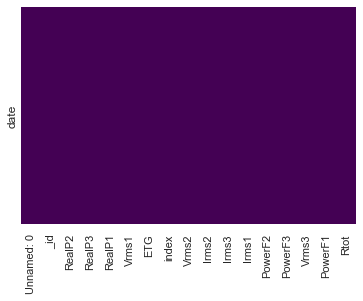

In [18]:
# chacking where null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

we can say there ar'nt null values or may can be not considered

## Statistical information

In [11]:
# Statistical info about data
df.describe()

,Unnamed: 0,RealP2,RealP3,RealP1,Vrms1,ETG,index,Vrms2,Irms2,Irms3,Irms1,PowerF2,PowerF3,Vrms3,PowerF1,Rtot
count,862357.00000,862357.000000,862357.000000,862357.000000,862357.000000,862357.0,862357.000000,862357.000000,862357.000000,862357.000000,862357.000000,862357.000000,862357.000000,862357.000000,862357.000000,862357.000000
mean,431178.00000,44.463618,62.509052,231.191072,257.731862,1.0,490699.807981,256.099656,535.587699,791.513162,1217.894135,0.267162,0.310634,257.909838,0.358240,338.163742
std,248941.16738,75.872497,111.125793,534.820219,1.922128,0.0,248978.166023,1.862584,578.072699,1363.891531,2038.410654,0.132004,0.069371,1.835225,0.350791,579.826838
min,0.00000,0.300000,0.000000,0.000000,248.600000,1.0,59338.000000,249.000000,218.700000,236.800000,243.800000,0.001000,0.000000,246.800000,0.000000,18.600000
25%,215589.00000,10.100000,22.800000,7.800000,256.300000,1.0,275113.000000,254.700000,242.000000,279.300000,397.900000,0.158000,0.304000,256.600000,0.076000,45.200000
50%,431178.00000,12.800000,24.800000,17.800000,257.800000,1.0,490717.000000,256.200000,248.500000,285.000000,454.300000,0.202000,0.328000,258.000000,0.153000,133.800000
75%,646767.00000,52.300000,27.000000,122.000000,259.200000,1.0,706306.000000,257.500000,581.400000,328.200000,641.900000,0.367000,0.356000,259.300000,0.794000,251.600000
max,862356.00000,793.800000,1268.700000,4566.900000,263.400000,1.0,921935.000000,262.200000,9345.200000,10857.700000,17949.200000,0.731000,0.606000,264.800000,0.997000,4912.800000


## Visualisation of Rtot variation

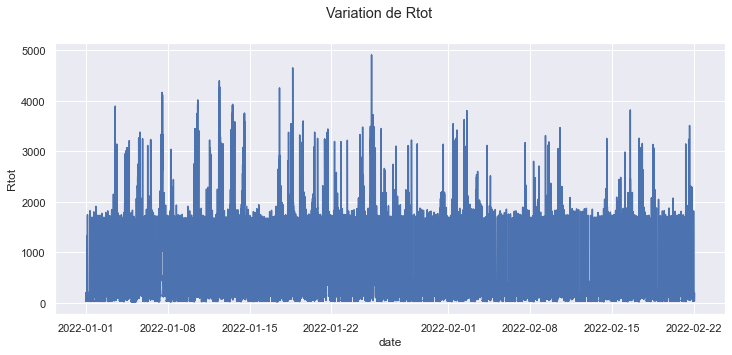

In [27]:
f,ax = plt.subplots(figsize=(12, 5))

plt.xlabel('date')
plt.ylabel('Rtot')
plt.suptitle('Variation de Rtot')
plt.plot(df['Rtot'])

Text(0.5, 0.98, 'Distribution de Rtot')

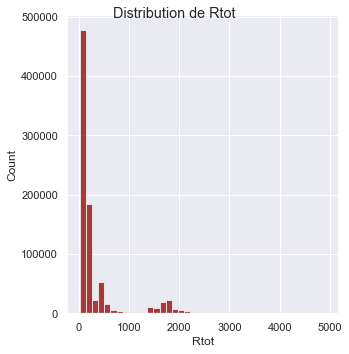

In [13]:
# is realp1 has a normal distribution 
sns.displot(df['Rtot'].dropna(),kde=False,color='darkred',bins=40)
plt.suptitle('Distribution de Rtot')


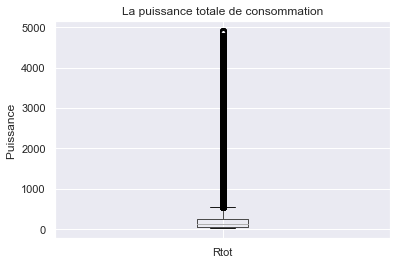

In [16]:
df.boxplot(column='Rtot')
plt.ylabel('Puissance ')
plt.title('La puissance totale de consommation')
plt.show()